In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

MNIST DATASET:

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train_mnist, y_train_mnist),(X_test_mnist,y_test_mnist) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Displaying all the classes

Training set shape: (60000, 28, 28)
Training set shape: (10000, 28, 28)



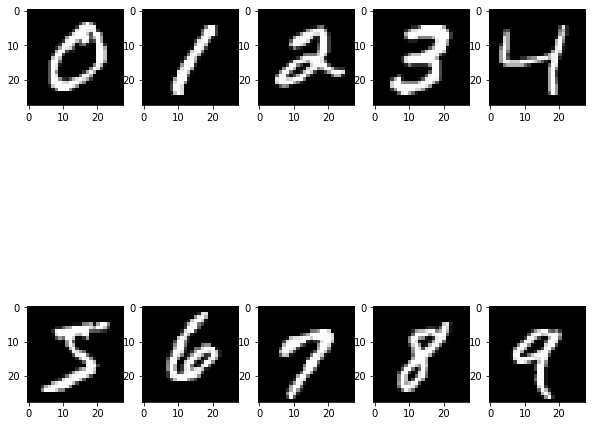

In [ ]:
print(f"Training set shape: {X_train_mnist.shape}")
print(f"Training set shape: {X_test_mnist.shape}\n")

# find minimum and maximum values of one sample data
np.max(X_train_mnist[0]) 
np.min(X_train_mnist[0])

# display one image from each class
(x,id) = np.unique(y_train_mnist, return_index=True)
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train_mnist[id[i]],cmap="gray")

In [ ]:
# perform normalisation
X_train_mnist = X_train_mnist/255
X_test_mnist = X_test_mnist/255

Designing the first CNN architecture:
-  One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0
- One Pooling layer which uses MAXPOOLING with stride =2.
- One hidden layer having number of neurons = 100
###### Note: use ReLU activation function after each convolution layer.

In [ ]:
# making the model
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(28,28,1)))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

In [ ]:
# compiling the model
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
batch_size_1=32
epochs_1=8

# training the model
history1 = model1.fit(X_train_mnist, y_train_mnist, batch_size=batch_size_1, epochs=epochs_1, validation_split=0.1)
model1.evaluate(X_test_mnist, y_test_mnist)

Epoch 1/8
1688/1688 [==============================] - 18s 3ms/step - loss: 0.1441 - accuracy: 0.9561 - val_loss: 0.0689 - val_accuracy: 0.9782
Epoch 2/8
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0496 - val_accuracy: 0.9850
Epoch 3/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0312 - accuracy: 0.9903 - val_loss: 0.0410 - val_accuracy: 0.9878
Epoch 4/8
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0429 - val_accuracy: 0.9885
Epoch 5/8
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0382 - val_accuracy: 0.9900
Epoch 6/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0557 - val_accuracy: 0.9855
Epoch 7/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0512 - val_accuracy: 0.987

[0.04252631589770317, 0.9879999756813049]

Designing the second CNN architecture:
- Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1 and, padding =0
- One Pooling layer which uses MAXPOOLING with stride =2.
- One hidden layer having number of neurons = 100
##### Note: use ReLU activation function after each convolution layer.

In [ ]:
# making the model
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(28,28,1)))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

In [ ]:
# compiling the model
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
batch_size_2=32
epochs_2=8

# training the model
history2 = model2.fit(X_train_mnist, y_train_mnist, batch_size=batch_size_2, epochs=epochs_2, validation_split=0.1)
model2.evaluate(X_test_mnist, y_test_mnist)

Epoch 1/8
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1395 - accuracy: 0.9569 - val_loss: 0.0640 - val_accuracy: 0.9820
Epoch 2/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.0482 - val_accuracy: 0.9875
Epoch 3/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0434 - val_accuracy: 0.9880
Epoch 4/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0463 - val_accuracy: 0.9883
Epoch 5/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0132 - accuracy: 0.9953 - val_loss: 0.0376 - val_accuracy: 0.9900
Epoch 6/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0653 - val_accuracy: 0.9857
Epoch 7/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0560 - val_accuracy: 0.9892

[0.041906680911779404, 0.9900000095367432]

Designing the third (LeNet-5) architecture:

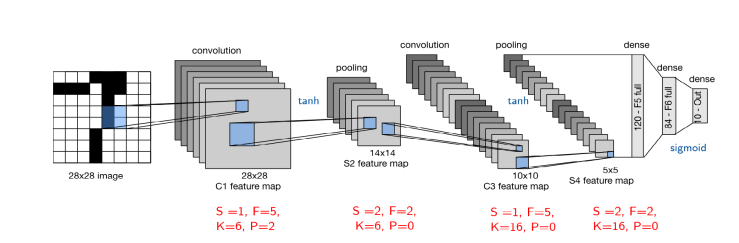

In [ ]:
# making the model
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(28,28,1)))
model3.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation="tanh", padding="same"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation="tanh", padding="valid"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(120, activation="sigmoid", name="HiddenLayer1"))
model3.add(tf.keras.layers.Dense(84, activation="sigmoid", name="HiddenLayer2"))
model3.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)              

In [ ]:
# compiling the model
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
batch_size_2=32
epochs_2=8

# training the model
history3 = model3.fit(X_train_mnist, y_train_mnist, batch_size=batch_size_2, epochs=epochs_2, validation_split=0.1)
model3.evaluate(X_test_mnist, y_test_mnist)

Epoch 1/8
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3159 - accuracy: 0.9192 - val_loss: 0.0727 - val_accuracy: 0.9805
Epoch 2/8
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0670 - accuracy: 0.9802 - val_loss: 0.0494 - val_accuracy: 0.9867
Epoch 3/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0446 - accuracy: 0.9866 - val_loss: 0.0407 - val_accuracy: 0.9885
Epoch 4/8
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0445 - val_accuracy: 0.9860
Epoch 5/8
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0367 - val_accuracy: 0.9900
Epoch 6/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0378 - val_accuracy: 0.9883
Epoch 7/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0155 - accuracy: 0.9955 - val_loss: 0.0451 - val_accuracy: 0.9867

[0.03278777003288269, 0.9894999861717224]

All three given architectures give a high and similar accuracy of 98% with the "adam" optimizer.
But the third model, LeNet-5 architecture, gave us the lowest loss.

Visualisation for the best model:

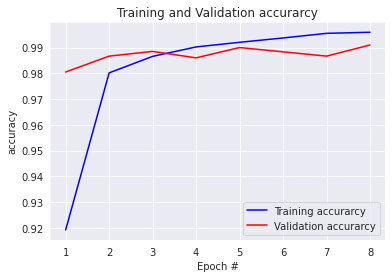

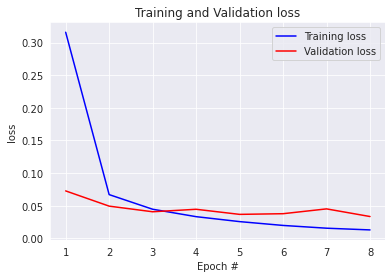

In [ ]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

---

CIFAR-10 DATASET:

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(X_train_cifar, y_train_cifar),(X_test_cifar,y_test_cifar) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


Training set shape: (50000, 32, 32, 3)
Training set shape: (10000, 32, 32, 3)



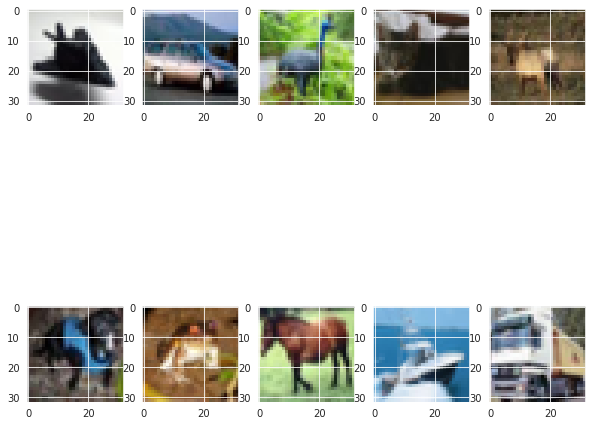

In [ ]:
print(f"Training set shape: {X_train_cifar.shape}")
print(f"Training set shape: {X_test_cifar.shape}\n")

# find minimum and maximum values of one sample data
np.max(X_train_cifar[0]) 
np.min(X_train_cifar[0])

# display one image from each class
(x,id) = np.unique(y_train_cifar, return_index=True)
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train_cifar[id[i]],cmap="gray")


In [ ]:
# perform normalisation
X_train_cifar = X_train_cifar/255
X_test_cifar = X_test_cifar/255

Designing the first CNN architecture:
-  One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0
- One Pooling layer which uses MAXPOOLING with stride =2.
- One hidden layer having number of neurons = 100
###### Note: use ReLU activation function after each convolution layer.

In [ ]:
# making the model
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(32,32,3)))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

In [ ]:
# compiling the model
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
batch_size_1=32
epochs_1=8

# training the model
history1 = model1.fit(X_train_cifar, y_train_cifar, batch_size=batch_size_1, epochs=epochs_1, validation_split=0.1)
model1.evaluate(X_test_cifar, y_test_cifar)

Epoch 1/8
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5075 - accuracy: 0.4621 - val_loss: 1.3146 - val_accuracy: 0.5296
Epoch 2/8
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2289 - accuracy: 0.5655 - val_loss: 1.2289 - val_accuracy: 0.5636
Epoch 3/8
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0973 - accuracy: 0.6132 - val_loss: 1.1327 - val_accuracy: 0.6096
Epoch 4/8
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0017 - accuracy: 0.6481 - val_loss: 1.0689 - val_accuracy: 0.6320
Epoch 5/8
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9339 - accuracy: 0.6722 - val_loss: 1.0677 - val_accuracy: 0.6380
Epoch 6/8
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8685 - accuracy: 0.6943 - val_loss: 1.0910 - val_accuracy: 0.6404
Epoch 7/8
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8127 - accuracy: 0.7160 - val_loss: 1.1023 - val_accuracy: 0.6276

[1.1116224527359009, 0.6319000124931335]

Designing the second CNN architecture:
- Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1 and, padding =0
- One Pooling layer which uses MAXPOOLING with stride =2.
- One hidden layer having number of neurons = 100
##### Note: use ReLU activation function after each convolution layer.

In [ ]:
# making the model
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(32,32,3)))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

In [ ]:
# compiling the model
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
batch_size_2=32
epochs_2=8

# training the model
history2 = model2.fit(X_train_cifar, y_train_cifar, batch_size=batch_size_2, epochs=epochs_2, validation_split=0.1)
model2.evaluate(X_test_cifar, y_test_cifar)

Epoch 1/8
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4179 - accuracy: 0.4919 - val_loss: 1.1698 - val_accuracy: 0.5886
Epoch 2/8
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0347 - accuracy: 0.6382 - val_loss: 1.0008 - val_accuracy: 0.6598
Epoch 3/8
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8761 - accuracy: 0.6947 - val_loss: 0.9387 - val_accuracy: 0.6794
Epoch 4/8
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7602 - accuracy: 0.7365 - val_loss: 0.9525 - val_accuracy: 0.6858
Epoch 5/8
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6622 - accuracy: 0.7703 - val_loss: 0.9505 - val_accuracy: 0.6890
Epoch 6/8
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5654 - accuracy: 0.8014 - val_loss: 1.0367 - val_accuracy: 0.6812
Epoch 7/8
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4733 - accuracy: 0.8366 - val_loss: 1.0915 - val_accuracy: 0.6706

[1.2557175159454346, 0.6513000130653381]

Designing the third (LeNet-5) architecture:

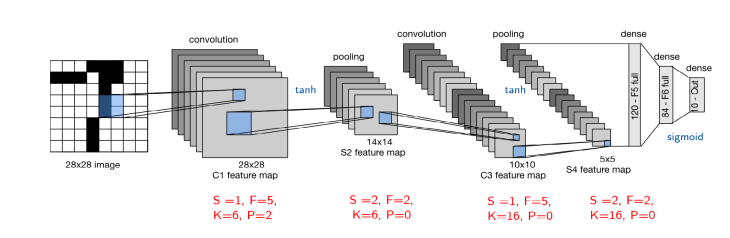

In [ ]:
# making the model
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(32,32,3)))
model3.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation="tanh", padding="same"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation="tanh", padding="valid"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(120, activation="sigmoid", name="HiddenLayer1"))
model3.add(tf.keras.layers.Dense(84, activation="sigmoid", name="HiddenLayer2"))
model3.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)              

In [ ]:
# compiling the model
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
batch_size_2=32
epochs_2=8

# training the model
history3 = model3.fit(X_train_cifar, y_train_cifar, batch_size=batch_size_2, epochs=epochs_2, validation_split=0.1)
model3.evaluate(X_test_cifar, y_test_cifar)

Epoch 1/8
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6992 - accuracy: 0.3824 - val_loss: 1.4468 - val_accuracy: 0.4756
Epoch 2/8
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3789 - accuracy: 0.5031 - val_loss: 1.2826 - val_accuracy: 0.5350
Epoch 3/8
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2483 - accuracy: 0.5518 - val_loss: 1.2187 - val_accuracy: 0.5638
Epoch 4/8
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1554 - accuracy: 0.5867 - val_loss: 1.1235 - val_accuracy: 0.6006
Epoch 5/8
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0827 - accuracy: 0.6145 - val_loss: 1.1324 - val_accuracy: 0.6018
Epoch 6/8
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0227 - accuracy: 0.6376 - val_loss: 1.1020 - val_accuracy: 0.6096
Epoch 7/8
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9689 - accuracy: 0.6557 - val_loss: 1.0676 - val_accuracy: 0.6272

[1.082780361175537, 0.6237999796867371]

All three given architectures give an average and similar accuracy of around 60% with the "adam" optimizer.
But the second CNN model gave us the highest accuracy of 65.9%.

Visualisation for the best model:

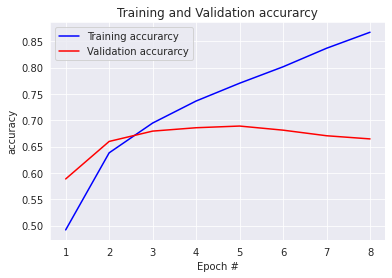

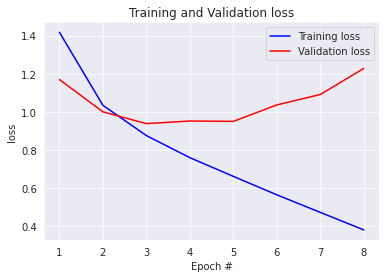

In [ ]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()